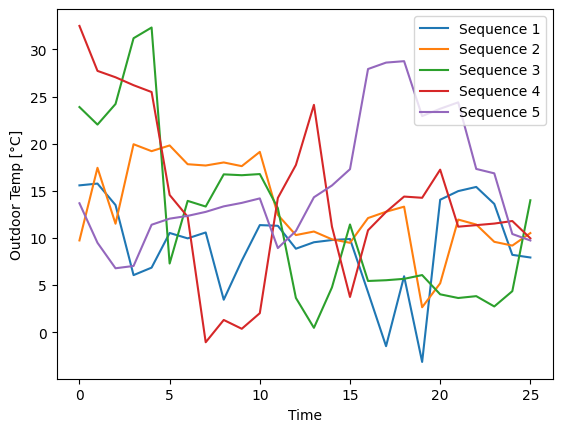

[15.574764848369671, 15.76366508721469, 13.489130696104306, 6.052728213608224, 6.846376078297768, 10.524848781715303, 9.950581406091707, 10.577414651641327, 3.4428110985669793, 7.582521601287817, 11.35937498691883, 11.285358425497604, 8.854158269708973, 9.540095531232073, 9.773507476128259, 9.885137225995225, 4.24076762909419, -1.486575675379342, 5.932821937010593, -3.156417021682988, 14.050066605914239, 14.965562366033343, 15.408613468417887, 13.605913587296286, 8.203924714829157, 7.921972809198939]


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

class ContinuousData:
    def __init__(self, count, min_val, max_val, range0=None, range1=None, required_data_percentage=0):
        self.count = count
        self.min_val = min_val
        self.max_val = max_val
        self.range0 = range0
        self.range1 = range1
        self.required_data_percentage = required_data_percentage

    def set_target_range(self, value1, value2):
        self.range0 = value1
        self.range1 = value2

    def void_target_range(self):
        self.range0 = None
        self.range1 = None

    def set_required_data_percentage(self, value):
        self.required_data_percentage = value

    def generate_target_points(self):
        if self.range0 is None or self.range1 is None:
            return None
        points = []
        total_points = int((self.count / 10) + 1)
        for i in range(int((self.required_data_percentage / 100) * total_points) + 1):
            points.append(self.range0 + (random.random() * (self.range1 - self.range0)))
        for i in range(total_points):
            points.append(self.min_val + (random.random() * (self.max_val - self.min_val)))
        random.shuffle(points)
        return points

    def generate_data(self):
        points = self.generate_target_points()
        if not points:
            return []
        values = []
        values.append(points[0])
        j = 0
        for i in range(1, self.count):
            max_addition = self.range1 / (self.range0 + self.range1)
            try:
                new_value = values[-1] + ((random.random() - 0.2) * (points[j + 1] - values[-1]))
                values.append(new_value)
                j += 1
                if j >= len(points):
                    j = 0
            except IndexError:
                break
        return values

# Parameters for data generation
min_val = -12
max_val = 37
range0 = 9
range1 = 21
required_data_percentage = 60
length = 150

# Generate sequences
sequences = []
data_generator = ContinuousData(length, min_val, max_val, range0, range1, required_data_percentage)
for _ in range(5):
    sequence = data_generator.generate_data()
    sequences.append(sequence)

# Visualize the continuous data
for i, seq in enumerate(sequences):
    plt.plot(seq, label=f'Sequence {i+1}')
plt.xlabel('Time')
plt.ylabel('Outdoor Temp [°C]')
plt.legend()
plt.show()

# Print one of the sequences to verify
print(sequences[0])


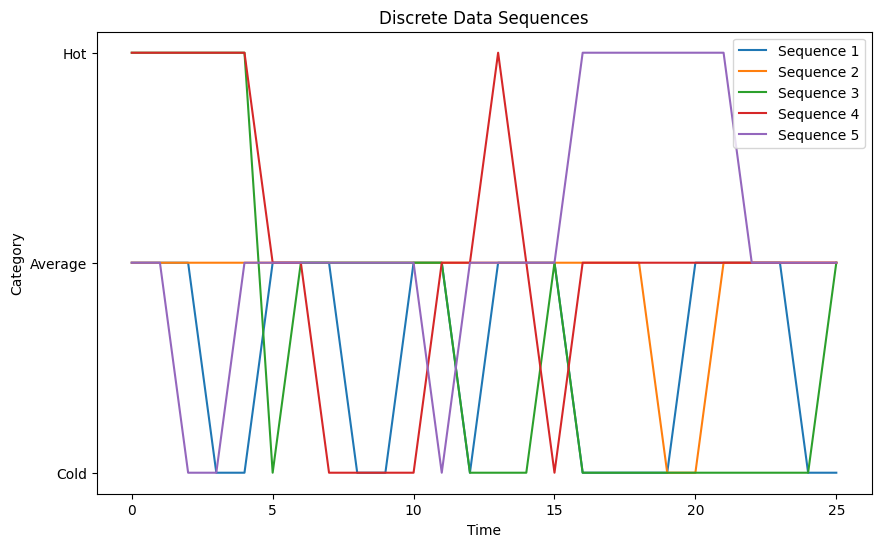

In [8]:
# Step 2c: Convert the data into discrete form
def categorize(value):
    if value < range0:
        return 0  # Cold
    elif value > range1:
        return 2  # Hot
    else:
        return 1  # Average

discrete_sequences = []
for seq in sequences:
    discrete_seq = [categorize(val) for val in seq]
    discrete_sequences.append(discrete_seq)


# Step 2d:Visualize the discrete data
plt.figure(figsize=(10, 6))
for i, seq in enumerate(discrete_sequences):
    plt.plot(seq, label=f'Sequence {i+1}')
plt.xlabel('Time')
plt.ylabel('Category')
plt.yticks([0, 1, 2], ['Cold', 'Average', 'Hot'])
plt.legend()
plt.title('Discrete Data Sequences')
plt.show()


In [9]:
print(discrete_sequences[0])
print(discrete_sequences[1])
print(discrete_sequences[2])
print(discrete_sequences[3])
print(discrete_sequences[4])

[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]


In [11]:
from hmmlearn import hmm

# Encode discrete symbols to integers
encoded_sequences = [np.array(seq).reshape(-1, 1) for seq in discrete_sequences]
X = np.concatenate(encoded_sequences)
lengths = [len(seq) for seq in discrete_sequences]

# Initialize and train HMM
model = hmm.CategoricalHMM(n_components=3, n_iter=100, tol=0.01, verbose=True)
model.fit(X, lengths)

# Print model parameters
print("Initial State Distribution (π):", model.startprob_)
print("Transition Matrix (A):", model.transmat_)
print("Emission Matrix (B):", model.emissionprob_)

Initial State Distribution (π): [0.52074867 0.39995404 0.07929729]
Transition Matrix (A): [[3.35096871e-01 5.81213259e-03 6.59090996e-01]
 [2.02896049e-01 7.96998233e-01 1.05717542e-04]
 [7.54251110e-01 1.95360748e-02 2.26212815e-01]]
Emission Matrix (B): [[2.99911550e-01 6.88294866e-01 1.17935838e-02]
 [2.68860277e-14 1.23387932e-06 9.99998766e-01]
 [2.97677342e-01 7.02185891e-01 1.36766832e-04]]


         1    -177.45999387             +nan
         2    -121.45945723     +56.00053664
         3    -120.39021837      +1.06923885
         4    -119.90945536      +0.48076301
         5    -119.65704272      +0.25241264
         6    -119.50401767      +0.15302505
         7    -119.39541882      +0.10859885
         8    -119.30508484      +0.09033398
         9    -119.21879834      +0.08628650
        10    -119.12683529      +0.09196305
        11    -119.01984726      +0.10698803
        12    -118.88538001      +0.13446725
        13    -118.70297537      +0.18240463
        14    -118.43481009      +0.26816528
        15    -118.00573360      +0.42907649
        16    -117.26181934      +0.74391426
        17    -115.90668347      +1.35513587
        18    -113.52346864      +2.38321484
        19    -110.01765067      +3.50581797
        20    -106.23628711      +3.78136356
        21    -103.19214968      +3.04413742
        22    -100.89414520      +2.29800448
        23

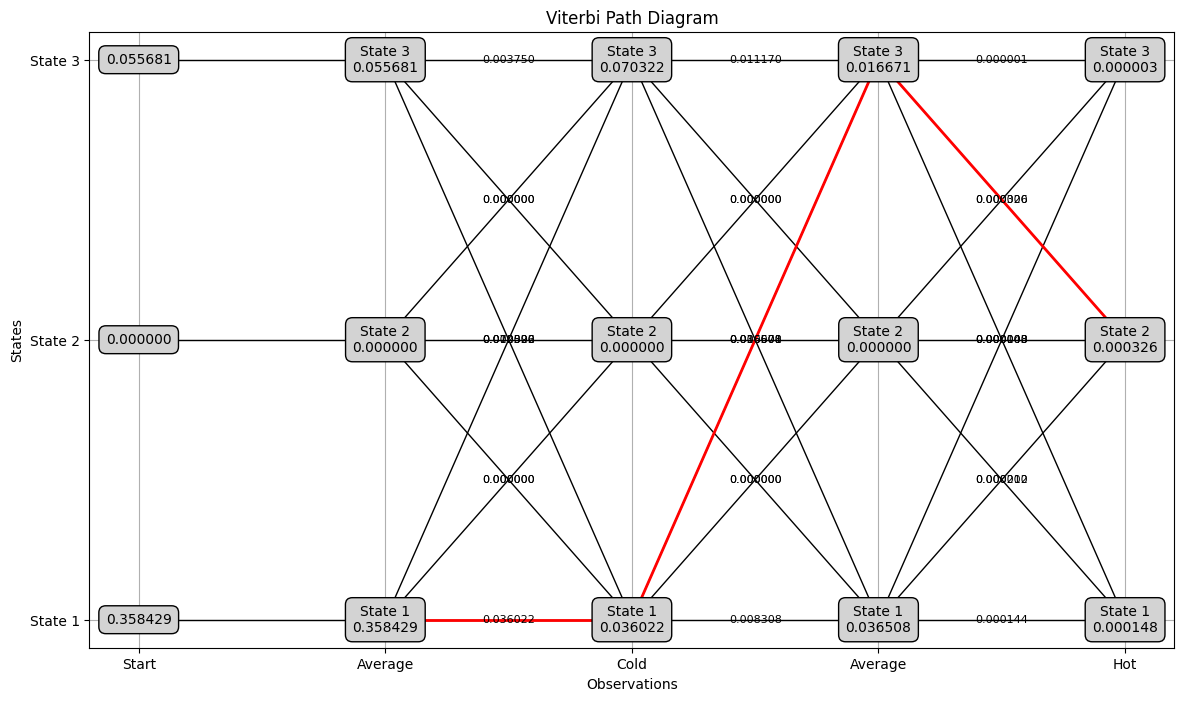

Viterbi path (most likely states): ['State 1', 'State 1', 'State 3', 'State 2']
Log probability of the Viterbi path: 0.0003256870714975976


In [17]:
# Given parameters
A = np.array([
    [0.335096871, 0.005812133, 0.659090996],
    [0.202896049, 0.796998233, 0.000105718],
    [0.754251110, 0.019536075, 0.226212815]
])

B = np.array([
    [0.299911550, 0.688294866, 0.011793583],
    [2.68860277e-14, 1.23387932e-06, 0.999998766],
    [0.297677342, 0.702185891, 0.000136767]
])

pi = np.array([0.52074867, 0.39995404, 0.07929729])

observations = [1, 0, 1, 2]  # Average, Cold, Average, Hot

# Number of states and observations
N = len(pi)
T = len(observations)

# Initialize the Viterbi table
V = np.zeros((T, N))
path = np.zeros((T, N), dtype=int)

# Initialization
V[0, :] = pi * B[:, observations[0]]

# Recursion
for t in range(1, T):
    for j in range(N):
        prob = V[t-1, :] * A[:, j] * B[j, observations[t]]
        V[t, j] = np.max(prob)
        path[t, j] = np.argmax(prob)

# Termination
best_path = np.zeros(T, dtype=int)
best_path[T-1] = np.argmax(V[T-1, :])
for t in range(T-2, -1, -1):
    best_path[t] = path[t + 1, best_path[t + 1]]

# Create the detailed Viterbi diagram
fig, ax = plt.subplots(figsize=(14, 8))

# State and observation labels
state_labels = ['State 1', 'State 2', 'State 3']
obs_labels = ['Average', 'Cold', 'Average', 'Hot']

# Plot nodes and edges with probabilities
for t in range(T):
    for state in range(N):
        # Draw the nodes
        ax.text(t, state, f"{state_labels[state]}\n{V[t, state]:.6f}", ha='center', va='center',
                bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
        if t > 0:
            for prev_state in range(N):
                trans_prob = A[prev_state, state]
                emiss_prob = B[state, observations[t]]
                prev_prob = V[t-1, prev_state]
                prob = prev_prob * trans_prob * emiss_prob
                # Draw the edges with probabilities
                ax.plot([t-1, t], [prev_state, state], 'k-', lw=1)
                ax.text((t-1 + t) / 2, (prev_state + state) / 2, f"{prob:.6f}", ha='center', va='center',
                        fontsize=8)

# Draw the initial probabilities
for state in range(N):
    ax.text(-1, state, f"{pi[state] * B[state, observations[0]]:.6f}", ha='center', va='center',
            bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
    ax.plot([-1, 0], [state, state], 'k-', lw=1)

# Highlight the Viterbi path
for t in range(1, T):
    start = best_path[t-1]
    end = best_path[t]
    ax.plot([t-1, t], [start, end], 'r-', lw=2)

# Add labels and grid
ax.set_xticks(range(-1, T))
ax.set_xticklabels(['Start'] + obs_labels)
ax.set_yticks(range(N))
ax.set_yticklabels(state_labels)
ax.grid(True)

plt.title('Viterbi Path Diagram')
plt.xlabel('Observations')
plt.ylabel('States')
plt.show()

# Print the Viterbi path
print("Viterbi path (most likely states):", [state_labels[state] for state in best_path])
print("Log probability of the Viterbi path:", np.max(V[T-1, :]))